In [38]:
import pandas as pd
import glob
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [39]:
RESULT_DIR = "./results/results_paper"

In [40]:
def get_latest_results_file(result_dir):    
    list_of_files = glob.glob(result_dir + '/*.csv') 
    latest_file = None
    if list_of_files:
        latest_file = max(list_of_files, key=os.path.getmtime)
    return latest_file

In [41]:
results_file = get_latest_results_file(RESULT_DIR)
df = pd.read_csv(results_file, header=[0])
display(df)

,dataset,optimizer,iteration,variation,runtime
0,Adiac,adam-1000-1,2_1304606831834338190,0.633249,625.493321
1,Adiac,adam-1000-1,0_635570499007058849,0.622548,654.829476
2,Adiac,adam-1000-1,1_370465051410731942,0.647986,654.463301
3,Adiac,adam-1000-1,3_1464982147617559500,0.612679,650.329337
4,Adiac,adam-1000-1,4_169887742225322971,0.645335,661.835801
...,...,...,...,...,...
5245,Yoga,adam-2000-5,24_1948804097479246981,50.933337,16736.123830
5246,Yoga,adam-2000-5,25_2241456709397874175,51.982800,16758.846071
5247,Yoga,adam-2000-5,27_1151624632237001637,47.322962,17455.221578
5248,Yoga,adam-2000-5,28_356369312343362844,72.960577,17451.663151


In [42]:
filter_func = lambda x: x['iteration'].count() != 30 or x['variation'].count() != 30 or x['runtime'].count() != 30
df.groupby(['dataset', 'optimizer']).filter(filter_func)

,dataset,optimizer,iteration,variation,runtime


In [43]:
unfinshed_datasets = df.groupby(['dataset', 'optimizer']).filter(filter_func)['dataset'].unique()
unfinshed_datasets

array([], dtype=object)

In [44]:
# df[df.dataset == "Adiac"].groupby('optimizer').count()

In [45]:
filter_datasets = list(unfinshed_datasets)#  + ['FaceFour']
filter_datasets

[]

In [46]:
df_filtered = df[~df.dataset.isin(filter_datasets)]

In [47]:
relevant_optimizers = ["adam-1000-1", "adam-1000-10", "ssg-1000-1", "ssg-1000-10"]
# df_filtered = df_filtered[df_filtered.optimizer.isin(relevant_optimizers)]

In [48]:
df_grouped = df_filtered.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
display(df_grouped)

variation                  runtime             
                           mean        std          mean          std
dataset optimizer                                                    
Adiac   adam-1000-1    0.633448   0.017109    714.972988    88.441117
        adam-1000-10   0.880984   0.225950    669.816043    64.668517
        adam-2000-5    0.670154   0.041192   1634.829894    13.608413
        sgld-1000-10  14.704153  12.351814   9423.247654  1286.550549
        sgld-2000-5   12.328555  10.465139  53248.264768  1380.964433
...                         ...        ...           ...          ...
Yoga    adam-1000-10  69.777681  33.708336   5395.963257   163.869233
        adam-2000-5   76.209044  31.053994  16816.613944   813.598004
        ssg-1000-1    63.630133  19.840079   9771.535562   306.292315
        ssg-1000-10   73.153503  32.621772   9964.573257   293.828635
        ssg-2000-5    70.234226  29.463125  14639.681308  1953.775149

[175 rows x 4 columns]

In [49]:
df_variation = df_filtered.drop(columns=['runtime'])
df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])

variation           
                           mean        std
dataset optimizer                         
Adiac   adam-1000-1    0.633448   0.017109
        adam-1000-10   0.880984   0.225950
        adam-2000-5    0.670154   0.041192
        sgld-1000-10  14.704153  12.351814
        sgld-2000-5   12.328555  10.465139
...                         ...        ...
Yoga    adam-1000-10  69.777681  33.708336
        adam-2000-5   76.209044  31.053994
        ssg-1000-1    63.630133  19.840079
        ssg-1000-10   73.153503  32.621772
        ssg-2000-5    70.234226  29.463125

[175 rows x 2 columns]

In [50]:
df_plot = df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
df_plot.columns = df_plot.columns.to_flat_index()
df_plot.reset_index(inplace=True)

df_plot = pd.melt(df_plot, id_vars=['dataset', 'optimizer'])
display(df_plot)

,dataset,optimizer,variable,value
0,Adiac,adam-1000-1,"(variation, mean)",0.633448
1,Adiac,adam-1000-10,"(variation, mean)",0.880984
2,Adiac,adam-2000-5,"(variation, mean)",0.670154
3,Adiac,sgld-1000-10,"(variation, mean)",14.704153
4,Adiac,sgld-2000-5,"(variation, mean)",12.328555
...,...,...,...,...
345,Yoga,adam-1000-10,"(variation, std)",33.708336
346,Yoga,adam-2000-5,"(variation, std)",31.053994
347,Yoga,ssg-1000-1,"(variation, std)",19.840079
348,Yoga,ssg-1000-10,"(variation, std)",32.621772


In [51]:
df_dataset_means = df_plot.groupby(['dataset', 'variable']).mean()
df_dataset_means.columns = df_dataset_means.columns.to_flat_index()
df_dataset_means.reset_index(inplace=True)

df_dataset_means['optimizer'] = 'dataset_mean'
df_dataset_means

,dataset,variable,value,optimizer
0,Adiac,"(variation, mean)",3.910098,dataset_mean
1,Adiac,"(variation, std)",2.918524,dataset_mean
2,Beef,"(variation, mean)",66.758884,dataset_mean
3,Beef,"(variation, std)",38.617294,dataset_mean
4,CBF,"(variation, mean)",25.872313,dataset_mean
5,CBF,"(variation, std)",7.940717,dataset_mean
6,ChlorineConcentration,"(variation, mean)",49.562953,dataset_mean
7,ChlorineConcentration,"(variation, std)",42.021456,dataset_mean
8,Coffee,"(variation, mean)",0.775441,dataset_mean
9,Coffee,"(variation, std)",0.090504,dataset_mean


In [52]:
df_plot_relative = pd.concat([df_plot, df_dataset_means], sort=True)
df_plot_relative['value'] = df_plot_relative.groupby(['dataset', 'variable']).transform(lambda x: x / x.mean())
df_plot_relative

,dataset,optimizer,value,variable
0,Adiac,adam-1000-1,0.162003,"(variation, mean)"
1,Adiac,adam-1000-10,0.225310,"(variation, mean)"
2,Adiac,adam-2000-5,0.171391,"(variation, mean)"
3,Adiac,sgld-1000-10,3.760558,"(variation, mean)"
4,Adiac,sgld-2000-5,3.153004,"(variation, mean)"
...,...,...,...,...
43,TwoPatterns,dataset_mean,1.000000,"(variation, std)"
44,Wafer,dataset_mean,1.000000,"(variation, mean)"
45,Wafer,dataset_mean,1.000000,"(variation, std)"
46,Yoga,dataset_mean,1.000000,"(variation, mean)"


In [53]:
df_plot_relative_mean = df_plot_relative[df_plot_relative.variable==('variation', 'mean')]
df_plot_relative_mean = df_plot_relative_mean.rename(columns={'value': 'relative variation'})
df_plot_relative_mean = df_plot_relative_mean.drop(columns=['variable'])
df_plot_relative_mean

,dataset,optimizer,relative variation
0,Adiac,adam-1000-1,0.162003
1,Adiac,adam-1000-10,0.225310
2,Adiac,adam-2000-5,0.171391
3,Adiac,sgld-1000-10,3.760558
4,Adiac,sgld-2000-5,3.153004
...,...,...,...
38,SyntheticControl,dataset_mean,1.000000
40,Trace,dataset_mean,1.000000
42,TwoPatterns,dataset_mean,1.000000
44,Wafer,dataset_mean,1.000000


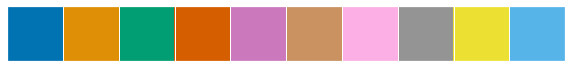

In [54]:
sns.palplot(sns.color_palette("colorblind"))

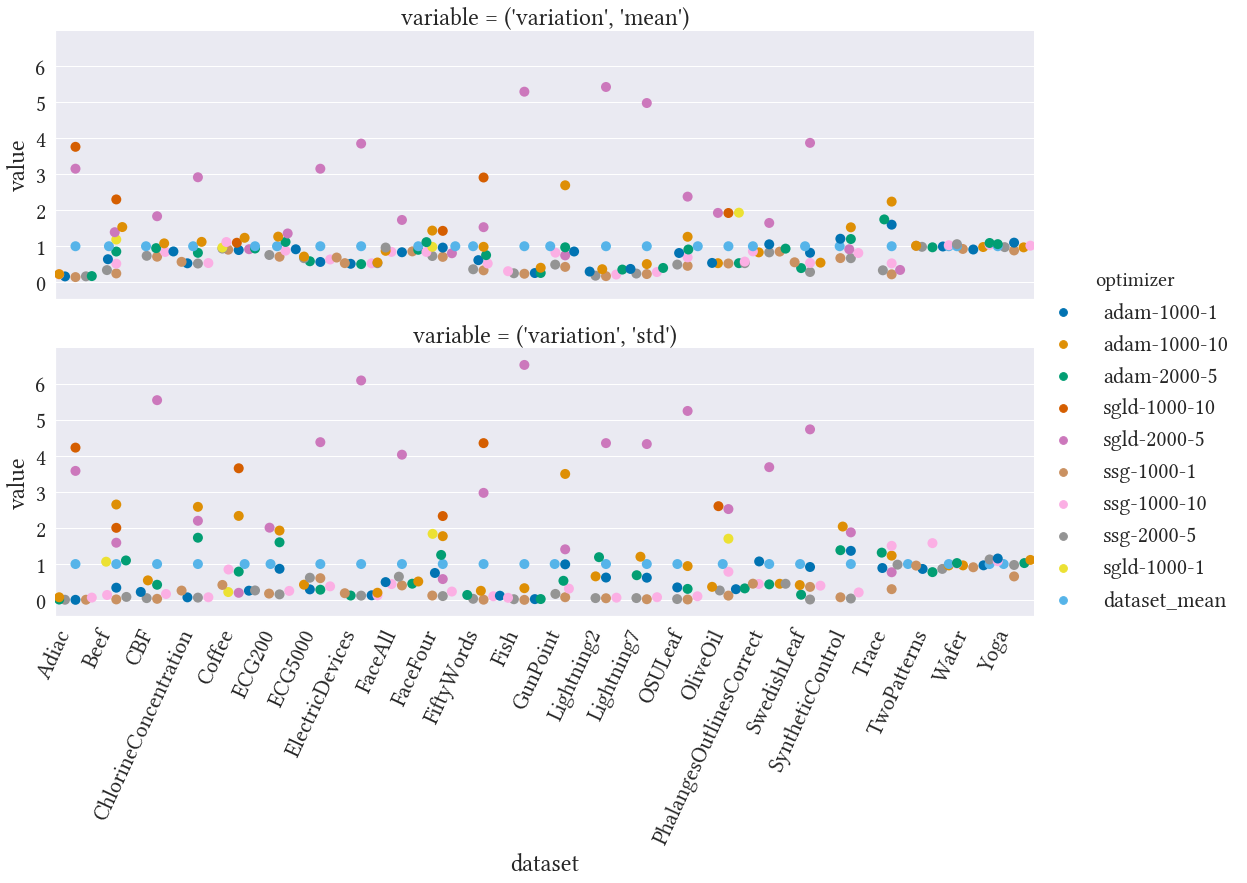

In [55]:
sns.set(font='Linux Libertine')
with sns.plotting_context('notebook', font_scale=2):
    chart = sns.catplot(x='dataset', y='value', hue='optimizer', row='variable', data=df_plot_relative, height=5, aspect=3, s=10, kind='swarm', palette='colorblind')
    plt.xticks(rotation=65, horizontalalignment='right')
plt.savefig('plot.pdf')

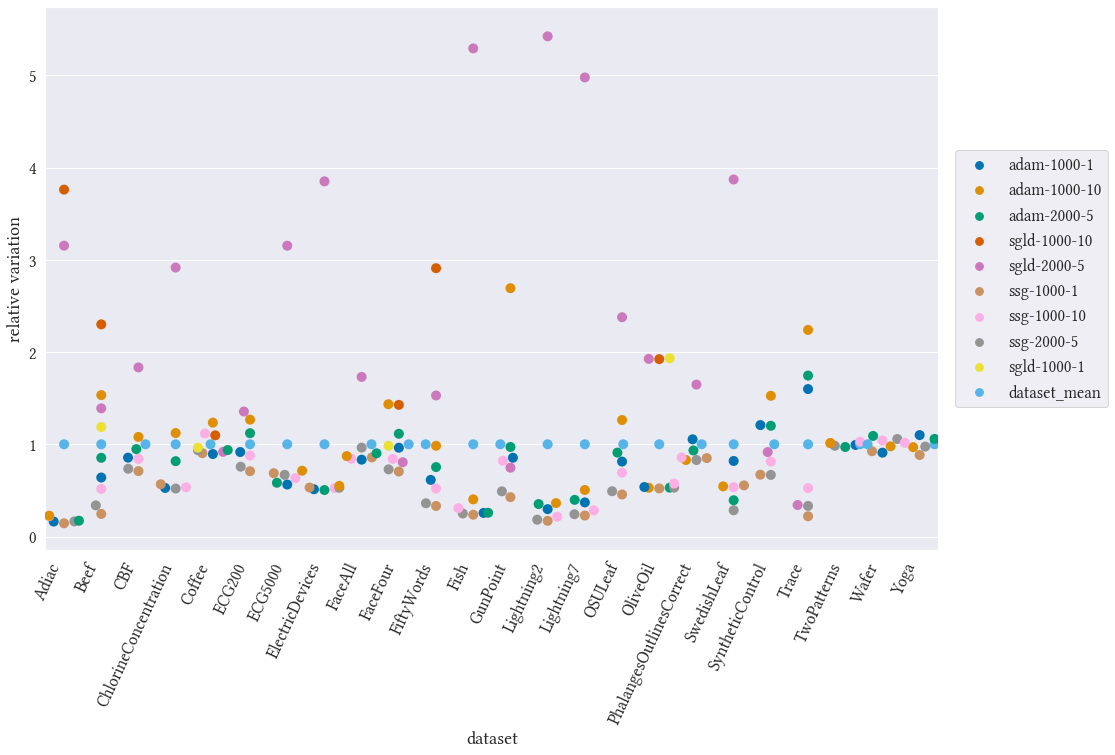

In [59]:
sns.set(font='Linux Libertine', font_scale=1.5)
fig, ax = plt.subplots(figsize=(16,10))
chart = sns.swarmplot(x='dataset', y='relative variation', hue='optimizer', data=df_plot_relative_mean, palette='colorblind', size=10, ax=ax)
chart.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1)
plt.xticks(rotation=65, horizontalalignment='right')
plt.savefig('plot_relative_mean.pdf', dpi=300, bbox_inches = "tight")

In [57]:
REFERENCE_FILE = "reference/5-sets_reference-results.csv"
df_r = pd.read_csv(REFERENCE_FILE)
df_r.groupby(['dataset']).mean()

,mean,std
dataset,,
Adiac,0.588,0.0140
Beef,23.830,3.4000
CBF,19.300,0.5940
ChlorineConcentration,15.396,0.5420
FiftyWords,21.382,1.7676


In [58]:
df_sign = df.copy()
df_sign['variation_sign'] = np.sign(df.variation)
df_sign.groupby(['dataset', 'optimizer']).variation_sign.value_counts().unstack()

variation_sign        1.0
dataset optimizer        
Adiac   adam-1000-1    30
        adam-1000-10   30
        adam-2000-5    30
        sgld-1000-10   30
        sgld-2000-5    30
...                   ...
Yoga    adam-1000-10   30
        adam-2000-5    30
        ssg-1000-1     30
        ssg-1000-10    30
        ssg-2000-5     30

[175 rows x 1 columns]